<a href="https://colab.research.google.com/github/shaqayeq-ramezanzade/Machine-Learning-Course/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
tf.__version__

'2.13.0'

Classification

In [ ]:
fmnist=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

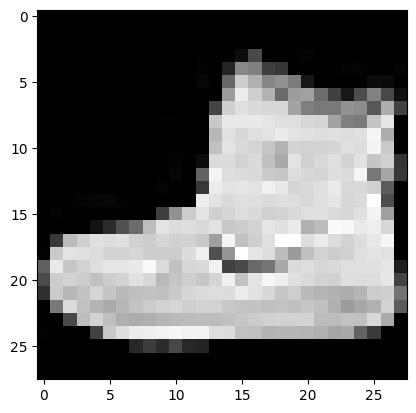

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
#normalize
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


Define Model

In [ ]:
from tensorflow.keras.layers import LeakyReLU
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'), #glorot_normal or glorot_uniform.... this initializers help with vanishing /exploiding challenges
    keras.layers.Dense(75, activation=LeakyReLU(alpha=0.03)),
    keras.layers.Dense(10, activation='softmax')
])

##kernel initializer besoorate uniform 'glorot_uniform' ast! bias initializer by default is zero!no need to change it.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 75)                7575      
                                                                 
 dense_20 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Fit Model

In [ ]:
history=model.fit(x_train,y_train,epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.7762 - accuracy: 0.7406 - val_loss: 0.5647 - val_accuracy: 0.8093
Epoch 2/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.5154 - accuracy: 0.8221 - val_loss: 0.5066 - val_accuracy: 0.8221
Epoch 3/10
1594/1594 [==============================] - 12s 7ms/step - loss: 0.4644 - accuracy: 0.8386 - val_loss: 0.4573 - val_accuracy: 0.8416
Epoch 4/10
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4345 - accuracy: 0.8491 - val_loss: 0.4325 - val_accuracy: 0.8493
Epoch 5/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4141 - accuracy: 0.8559 - val_loss: 0.4316 - val_accuracy: 0.8488
Epoch 6/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3989 - accuracy: 0.8593 - val_loss: 0.4196 - val_accuracy: 0.8576
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3862 - accuracy: 0.8632 - val_loss: 0.4054 - val_accuracy

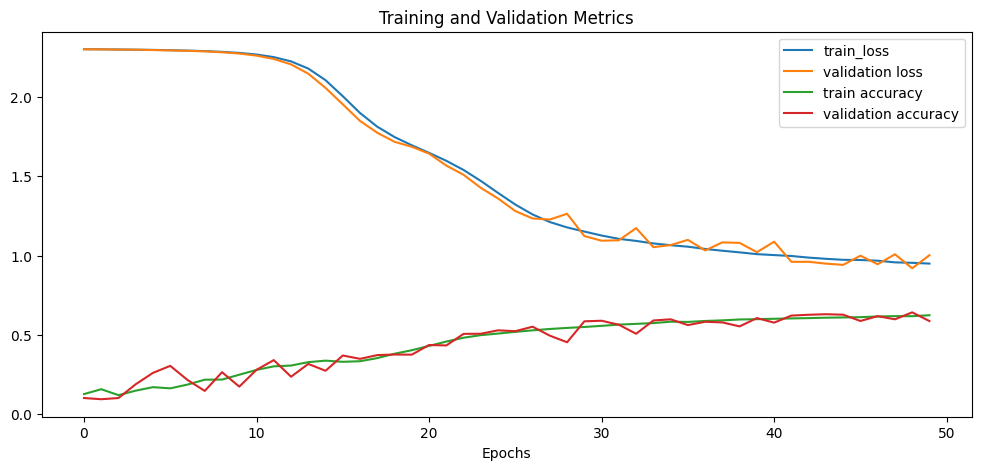

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='validation loss')
ax.plot(history.history['accuracy'], label='train accuracy')
ax.plot(history.history['val_accuracy'], label='validation accuracy')

ax.legend()
ax.set_xlabel('Epochs')
ax.set_title('Training and Validation Metrics')
plt.show()


In [ ]:
model.save('my_model.keras')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.src.saving.saving_api import load_model
load_model=tf.keras.models.load_model('my_model.keras')

OSError: ignored

In [ ]:
load_model

# Vanishing / Exploiding gradients challenge

# important initializations at Keras

In [ ]:
from google.colab import files

# Use the interactive file picker
uploaded = files.upload()

Saving frr.PNG to frr.PNG


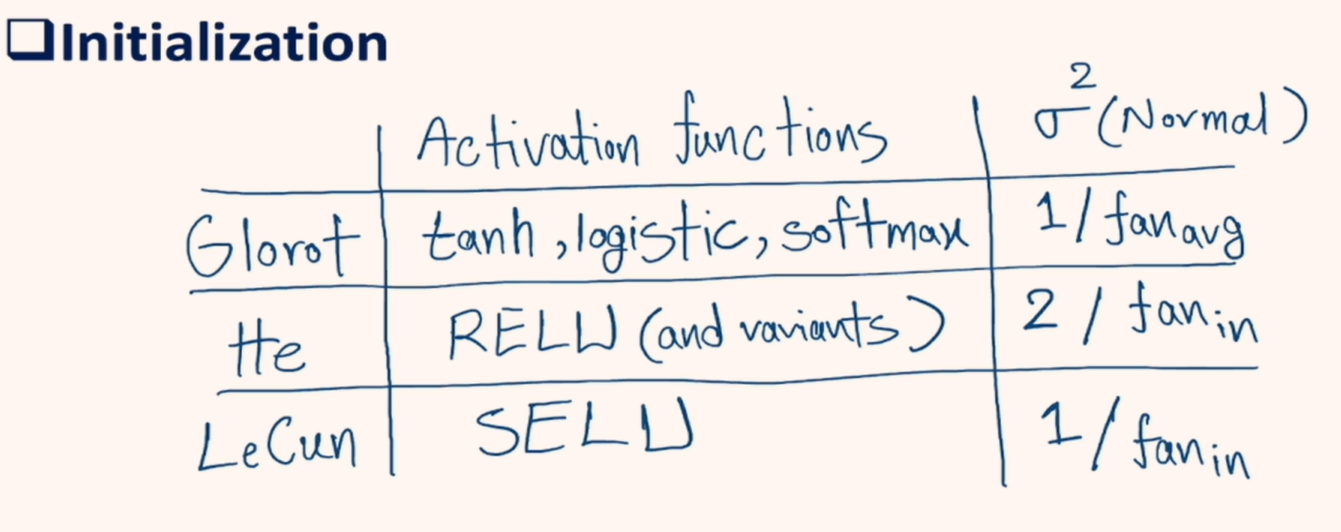

In [ ]:
Image(filename='frr.PNG')



---



# Activation functions

RELU: variations are leaky relu, randomized leaky relu, and parametric leaky relu

## big models variations are better than relu
## Small models, dont use parametric leaky relu
# (always use leaky relu)
Elu as hame ina behtar vali zamanbar tar hast...

# Scaled Elu=Selu
Selu in networks that are not wide and deep (just deep networks with no skip way of data), has a 'self normalizing' effect
so a classic initialier like le cun is even fine with selu-data at first should be normalized

# Nonsaturated AF
## Selu>elu>leaky relu>relu>tanh>logistic

# not self normalizing:Elu
# speed: Relu

# Batch Normalization
give me mini batch, mean of mb, variance of mb,normalizatiion of mb>> scale and shift

pas laye b laye y ha normalization misgan va too ye parametr zarb va jam mishan


too keras mooving average estefade mishe parametr haye scale mini batch jadid ba seri batch haye ghabli miangim migiram vase mohasebe parametr ha

# layer of batch normalization should be added after each dense layer (after each AF)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
fmnist=keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#normalize
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [ ]:
init_1=keras.initializers.variance_scaling(scale=2.0, mode='fan_avg')

In [ ]:
model_2= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='elu', kernel_initializer=init_1), #glorot_normal or glorot_uniform.... this initializers help with vanishing /exploiding challenges
    keras.layers.BatchNormalization(),
    keras.layers.Dense(75, activation=LeakyReLU(alpha=0.03)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

##kernel initializer besoorate uniform 'glorot_uniform' ast! bias initializer by default is zero!no need to change it.

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model_2.summary() #ba ijad layers of batch normalization, yeseri non trainable params ijad mishe

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_13 (Dense)            (None, 75)                7575      
                                                                 
 batch_normalization_1 (Bat  (None, 75)                300       
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 10)               

In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history=model_2.fit(x_train,y_train,epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 9s 4ms/step - loss: 1.7668 - accuracy: 0.6395 - val_loss: 2.7857 - val_accuracy: 0.5814
Epoch 2/10
1594/1594 [==============================] - 5s 3ms/step - loss: 1.4564 - accuracy: 0.6758 - val_loss: 1.1352 - val_accuracy: 0.7517
Epoch 3/10
1594/1594 [==============================] - 6s 4ms/step - loss: 1.3822 - accuracy: 0.6551 - val_loss: 1.8023 - val_accuracy: 0.4272
Epoch 4/10
1594/1594 [==============================] - 6s 3ms/step - loss: 1.5365 - accuracy: 0.4659 - val_loss: 1.3832 - val_accuracy: 0.6297
Epoch 5/10
1594/1594 [==============================] - 7s 4ms/step - loss: 1.6765 - accuracy: 0.3714 - val_loss: 1.8868 - val_accuracy: 0.3343
Epoch 6/10
1594/1594 [==============================] - 6s 4ms/step - loss: 1.9138 - accuracy: 0.3141 - val_loss: 1.8603 - val_accuracy: 0.3886
Epoch 7/10
1594/1594 [==============================] - 9s 5ms/step - loss: 1.8916 - accuracy: 0.3415 - val_loss: 1.8588 - val_accuracy:

#Solve Exploiding Gradient: Gradient Clipping (mostly for RNN or recurrent neural networks, that the gradients get bigger and bigger...)

one solution is gradient clipping> in keras optimizers

massalan in SGD , clipnorm va clipvalue ro darim

In [ ]:
sgd=keras.optimizers.SGD(clipvalue=1.0) #rastaye gradient momkene as dast bere vali clipnorm rasta ro hefz mikone
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
history=model_2.fit(x_train, y_train, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.6134 - accuracy: 0.7892 - val_loss: 0.4754 - val_accuracy: 0.8278
Epoch 2/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4547 - accuracy: 0.8401 - val_loss: 0.4099 - val_accuracy: 0.8521
Epoch 3/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4139 - accuracy: 0.8544 - val_loss: 0.3956 - val_accuracy: 0.8571
Epoch 4/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3882 - accuracy: 0.8623 - val_loss: 0.3799 - val_accuracy: 0.8637
Epoch 5/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3677 - accuracy: 0.8696 - val_loss: 0.3746 - val_accuracy: 0.8666
Epoch 6/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3538 - accuracy: 0.8725 - val_loss: 0.3592 - val_accuracy: 0.8734
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3423 - accuracy: 0.8777 - val_loss: 0.3757 - val_accuracy:

# hala mikham ye transfer learning bezanam roo model avvalam pas load mikonamesh

In [ ]:
model.save('model0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1=keras.models.load_model('model0.h5')

In [ ]:
model1.layers

In [ ]:
#alan hame layer ha trainable hastan
model1.layers[2].trainable

True

In [ ]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 75)                7575      
                                                                 
 dense_20 (Dense)            (None, 10)                760       
                                                                 
Total params: 86835 (339.20 KB)
Trainable params: 86835 (339.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2=keras.models.Sequential(model1.layers[:-1])
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 75)                7575      
                                                                 
 dense_21 (Dense)            (None, 1)                 76        
                                                                 
Total params: 86151 (336.53 KB)
Trainable params: 86151 (336.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#felan ina hamash trainable hast
for layer in model2.layers:
  print(layer.trainable)

True
True
True
True


## hala freeze konim laye haro

In [ ]:
for layer in model2.layers:
  layer.trainable=False
  print(layer.trainable)

False
False
False
False


In [ ]:
model2.summary() #hala hich trainabe param nadare

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 75)                7575      
                                                                 
 dense_21 (Dense)            (None, 1)                 76        
                                                                 
Total params: 86151 (336.53 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 86151 (336.53 KB)
_________________________________________________________________


# hala age didim amalhardesh khoob nis hey laye b laye miam paein tar va trainable mikonim (az halat freeze kharej mikonim)

# clone model, so the params of main model is not changed while transfer learning

In [ ]:
import keras

# Load the original model from file
model0 = keras.models.load_model('model0.h5')

# Clone the original model
model0_cloned = keras.models.clone_model(model0)
model0_cloned.set_weights(model0.get_weights())


In [ ]:
y_train

NameError: ignored

In [ ]:
#my new model just wants to say if the pic is boot or not , if boot, yes va if not no
y_train_new=np.where(y_train==9,1,0)[:5000]
y_train_new.shape

In [ ]:
np.sum(y_train_new)

In [ ]:
x_train_new=x_train[:5000,:,:]
x_train_new.shape

NameError: ignored

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

NameError: ignored

In [ ]:
model2.fit(x_train_new, y_train_new, epochs=15, validation_split=0.15)

NameError: ignored

#Limited data:1-transfer learning, unsupervised pretraining (GAN) 3-find similar task with lots of data

# challenge of time: faster optimizers

##SGD, momentum optimization, nestrov, adaGrad, RMSprop, Adam, Nadam,learning rate scheduling

# Stochastic Gradient Descent (SGD)
## Initial parameter for SGD are weights and bias, needs a leraning rate schedule

# Optimizers

In [ ]:
# piade szi gradient decent 1 dimentional
def func(x):
  return x**2


def func_grad(x):
  return 2*x

In [ ]:
def gradient_decent(lr, func_grad):
  x=-10
  x_values=[x]
  for i in range(10):    #10 yani 10 ta iteration
    x-=lr*func_grad(x)
    x_values.append(x)
  print('iteration 10, x: %s'%x)
  return x_values

In [ ]:
def search_path(x_vals,func):
  x_line=np.arange(-15,15,0.01)
  plt.plot(x_line, [func(x) for x in x_line])
  plt.plot(x_vals, [func(x) for x in x_vals], 'ro-')

iteration 10, x: -1.0737418240000003


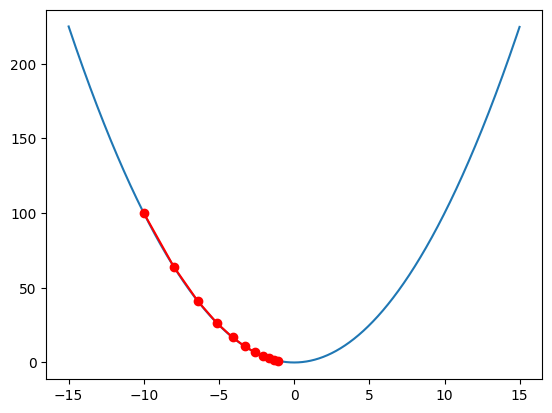

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values=gradient_decent(0.1, func_grad)
search_path(x_values, func)

iteration 10, x: -8.17072806887547


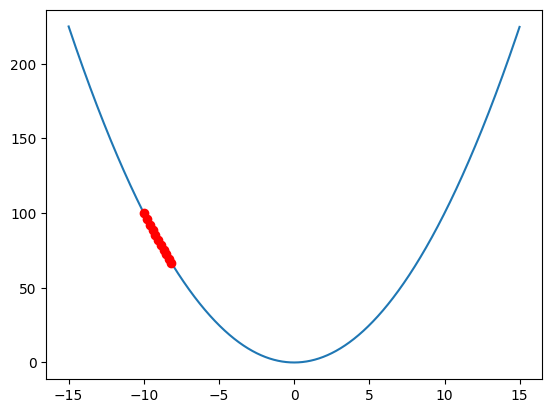

In [ ]:
x_values=gradient_decent(0.01, func_grad)
search_path(x_values, func)

iteration 10, x: -0.060466176000000066


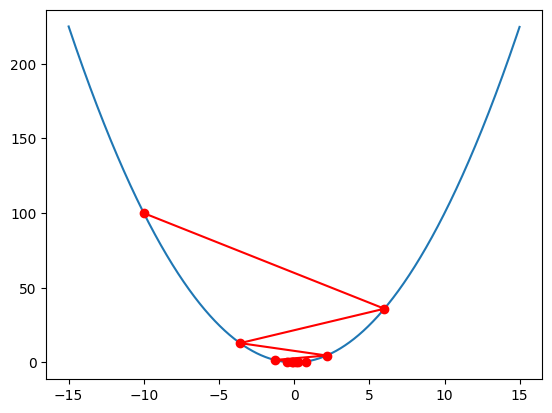

In [ ]:
x_values=gradient_decent(0.8, func_grad)
search_path(x_values, func)

## 2D gradient decent

Stochastic gradient decent can be better than gradiebt decent! na faghat dar zaman e hamgarayei balke dar keifiat hamgatayei

### SGD bekhatere navasanat k dar maishresh rahat tar az local optimum farar mikone va mire samte global optimum

# Momentum optimization (SGD with Momentum)
vaghti roo platue (shib kam) baes afzayesh sorat mishe, vali gahan baes overshoot mishe. yek momentum parameter ham niaze

chetor momentum ro be SGD ezafe konim?

its default: SGD(learning_rate=0.01, momentum=0.0, Nesterov=False, name='SGD')

## momentum kh sari miresoone khodesho be nohte nahaei
lr bozorg va momentum baeses overshoot mishe!

# Nesterov
## avval momentum jump emal mishe mirese be ye tetea va baad gradient jump(moshtagh)




# Adaptive optimizers

will adapt the learning rate with the slope

Mamoolan nesbat b taghirat hyperparameters behtar as SGD ha

# Adagrad
lr mikhad (esmesh Global learning rate) small constant, gradient accumulation variable. dar hein hamgarayi miad lr ro kam mikone.
# Pas bayad lr avval Adagrad ro bozorg gozasht!!!!

tf.keras.optimizers.Adagrad(
  learning_rate, initial_accumulator_value, epsilon)



##Moshekele Adagrad: Har cheghad jelo miri lr koochik tar mishe> sorat kam mishe


# RMSProp

## ye parametr darim b esme 'Rho' va koochk kardane lr daste mast!

RMSprop mitoone momentum ham begire


# Adam

Mitoone ba iteration haye kamtari nesbat b baghie berese b noghte hamgarayei

# baraye shoroo Adam khoobe age khoob nashod berid Adamax, rmsprop va bad SGD with momentum

# NADAM:Nesterov momentum + Adam

Saving optimizer.PNG to optimizer (2).PNG


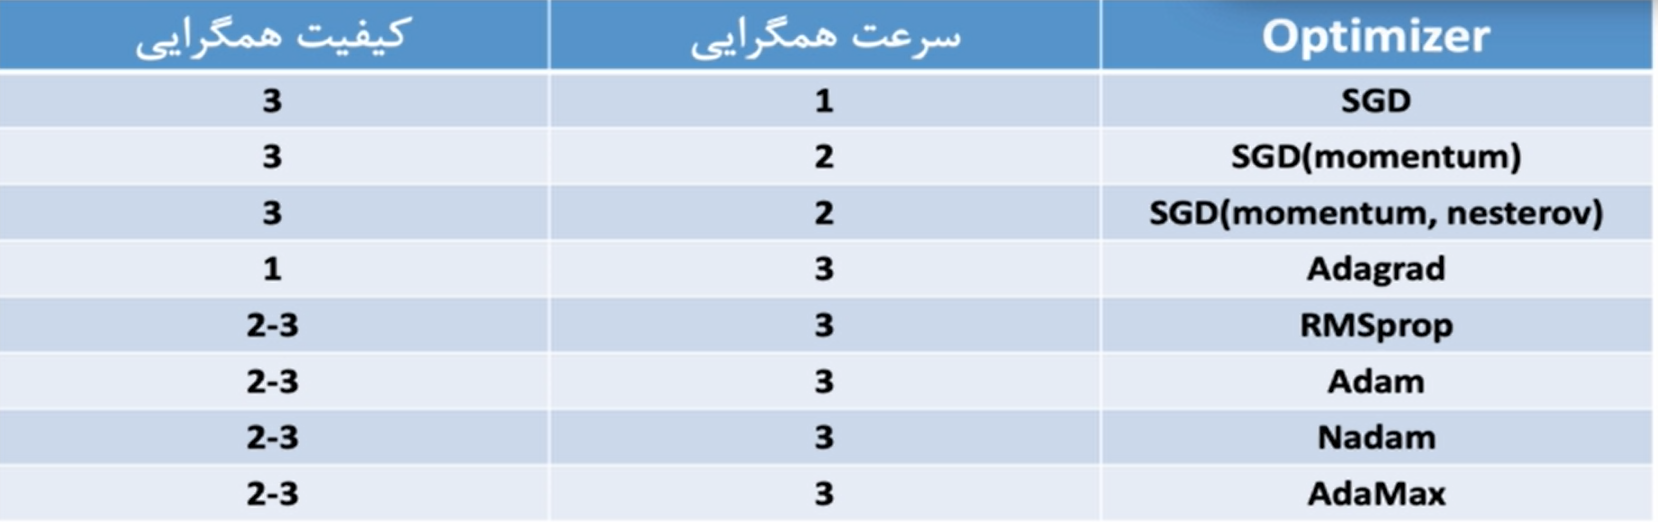

In [ ]:
from google.colab import files
from IPython.display import display, Image

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

display(Image(filename=image_path))

# Chapter 4-Convolutional Neural Network

in grey scale value of each pixel can be between 0-255
in colour scale we consider RGB channel

yani satr, sotun va omgh dar nazar migirim

red0-255, blue0-255, green 0-255 tarkib ina har rangi mitoone besaze

# dar amaliate Conlotion ye filter rooye ye array emal mishe>>> convolved image is smaller than main image

## if you want the same size than consider a padding layer (0f 0) around the main image before convolution

## too kar ba image ma mamoolan padding mizarim k size input=size output

## in convolution, the stride is beydefault 1 but if you put stride 2 or more, the convolved image will be even smaller

##filter ha baraye labe yabi. vaght migim laye haye paei khottot peida mikonan yani hamin filter ha

# tasvir gorg (416,528, 3) mishe shape e tasvir, satr, sotun, rgb channel

man mitoonam chanta filter bezaram roosh va chand conced image mide

## inja filter ha mishan hamoon neuron ha!

miam convolved image haro michasboonim b hamdige (1, 416, 528, 4) 1 yani 1 tasvir, satr , sotun va 4 filter emal shode

# convoleved image == featuremap


when working with convoultional layers no flatten layer is needed!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train.shape #50000 aks, 32 satr, 32 sotoon, 3 channel (rgb)

(50000, 32, 32, 3)

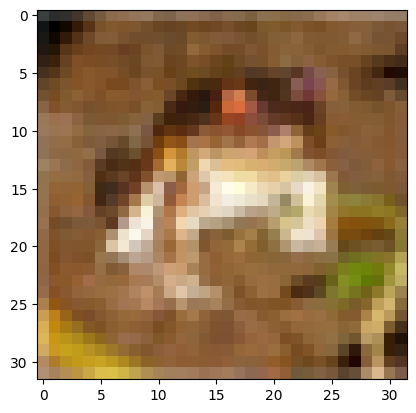

In [ ]:
plt.imshow(x_train[0,:,:,:]) #akse aval, hame satr ha, hame sotoon ha , va hame channel ha

In [ ]:
images=x_train[1:3, :, :, :]/255.0
images.shape

(2, 32, 32, 3)

In [ ]:
images.dtype #ba normalization az halate unit8 dar miad!

dtype('float64')

In [ ]:
filters=np.zeros((5,5,3,2)) #satr, sotoon, channels, number of filters

in 2 ta filter k ijda kardam felan featuremap ro siah mikone! pas miam taghiresh midam

In [ ]:
filters[:, 2, :, 0]=1  #hame satr ha va faghat sotoon 2, hame channel ha vase filter avval(index=0) baabar ba 1, behem yek khat vertical mide!
filters[2,:,:,1]=1 #hala filter ba yek khat ofoghi

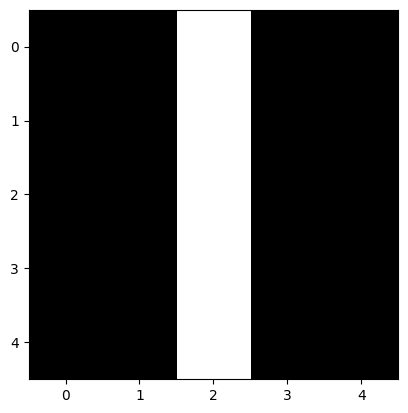

In [ ]:
plt.imshow(filters[:,:,:,0])

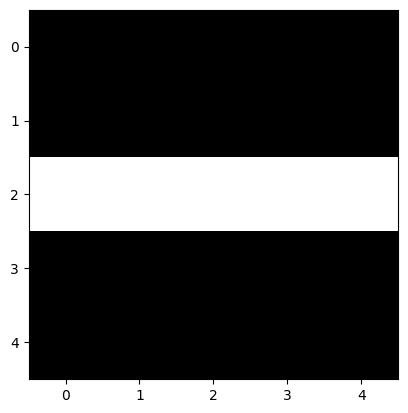

In [ ]:
plt.imshow(filters[:,:,:,1])

In [ ]:
convolved_images = tf.nn.conv2d(images, filters, strides=1, padding='SAME')

In [ ]:
convolved_images.shape

TensorShape([2, 32, 32, 2])

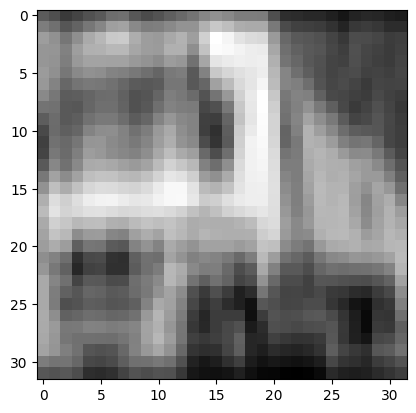

In [ ]:
plt.imshow(convolved_images[0,:,:,0], cmap='gray')

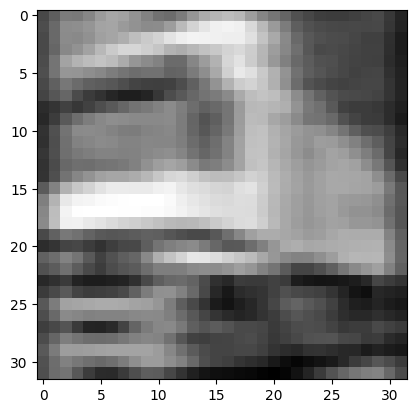

In [ ]:
plt.imshow(convolved_images[0,:,:,1],cmap='gray')

#maxpooling age didi underfit rokh dad bardar

# Con va pool b dense > bayad flatten koni bedi

# Lenet for fashion MNIST

state of art e Mnist , cifar is Conv! so better outcomes than before

In [ ]:
(x_train,y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train, x_test=x_train, x_test/255.0

In [ ]:
x_train.shape
#too model mizanam 28 , 28 va chon 1 channel daram 8gray cmap) mizaram 1

(60000, 28, 28)

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(50, 5,activation='relu', padding='SAME', input_shape=[28,28,1]), #harchi mirim jeloo tedade filter ha balatar(more featuremaps:64; 128, 256,... ), layer avval fliter size 5 ya 7 vali jeloo tar 3 khoobe
    keras.layers.MaxPooling2D(2), #mamoolan maxpooling 2 dar 2
    keras.layers.Conv2D(100, 3, activation='relu', padding='SAME'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation='relu', padding='SAME'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics='accuracy')

In [ ]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.15) #CNN kond tar az NN

Epoch 1/20
1594/1594 [==============================] - 218s 135ms/step - loss: 1.5269 - accuracy: 0.4255 - val_loss: 0.6322 - val_accuracy: 0.7642
Epoch 2/20
1594/1594 [==============================] - 205s 128ms/step - loss: 0.6401 - accuracy: 0.7735 - val_loss: 0.4116 - val_accuracy: 0.8540
Epoch 3/20
1594/1594 [==============================] - 215s 135ms/step - loss: 0.4694 - accuracy: 0.8362 - val_loss: 0.3540 - val_accuracy: 0.8696
Epoch 4/20
1475/1594 [==========================>...] - ETA: 16s - loss: 0.4115 - accuracy: 0.8539

KeyboardInterrupt: ignored

# use a good model

# include_top=True yani hamon kar, false yani ye kar dg mikham!
Age include_top=true , pas bayad shape mese hamoon model avval bashe

In [ ]:
import cv2

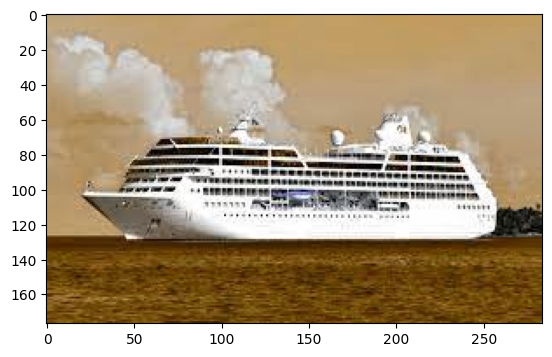

In [ ]:
ship=cv2.imread('ship.jpg')
plt.imshow(ship)

In [ ]:
xception=keras.applications.Xception()

In [ ]:
ship.shape

(177, 284, 3)

# ready algorithms would always  consider that you have normalized the figs!!

In [ ]:
ship=ship.reshape(1,177, 284, 3) #be forme batch dar miaram

In [ ]:
ship.shape #hala shod be form e batch

(1, 177, 284, 3)

In [ ]:
# baraye xception bayad size[299, 299] bashe, pas hala size ro dodorst mikonam
ship_new=tf.image.resize(ship,[299,299])

In [ ]:
ship_new.shape

TensorShape([1, 299, 299, 3])

In [ ]:
y_prob=xception.predict(ship_new)

1/1 [==============================] - 3s 3s/step


In [ ]:
y_prob

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
keras.applications.xception.decode_predictions(y_prob, top=5)

35363/35363 [==============================] - 0s 0us/step


[[('n04127249', 'safety_pin', 1.0),
  ('n03775546', 'mixing_bowl', 4.5441777e-16),
  ('n02443484', 'black-footed_ferret', 9.601444e-22),
  ('n03942813', 'ping-pong_ball', 2.8967044e-34),
  ('n15075141', 'toilet_tissue', 0.0)]]

# Tamame pishbiniha eshtebah chon man normalize nakardam data ro

the right way:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
import cv2

In [ ]:
ship=plt.imread('ship.jpg')

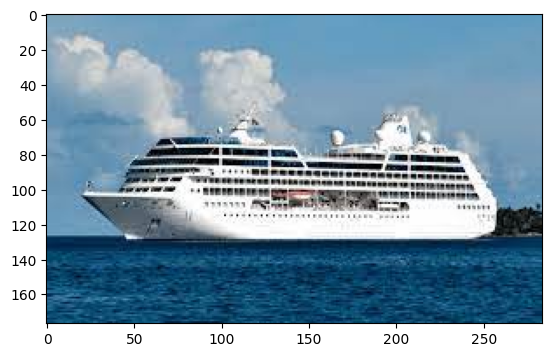

In [ ]:
plt.imshow(ship)

In [ ]:
ship.shape

(177, 284, 3)

In [ ]:
ship=ship.reshape(1,177,284,3)/255.0    #making batch,normalize data

In [ ]:
ship=tf.image.resize(ship,[299,299]) #only acceptable size for Xception is 299,299

In [ ]:
ship.shape

TensorShape([1, 299, 299, 3])

In [ ]:
xception=keras.applications.Xception() #farakhani Xception

91884032/91884032 [==============================] - 4s 0us/step


In [ ]:
y_prob=xception.predict(ship)

1/1 [==============================] - 4s 4s/step


In [ ]:
keras.applications.xception.decode_predictions(y_prob, top=5) #javabe dodorst liner hast!

[[('n03673027', 'liner', 0.93747544),
  ('n03216828', 'dock', 0.001785741),
  ('n03344393', 'fireboat', 0.0014925164),
  ('n02981792', 'catamaran', 0.0011119426),
  ('n07831146', 'carbonara', 0.00042667656)]]

# now ready model with transferlearning (this time with cifar10)

In [ ]:
xception_base=keras.applications.Xception(include_top=False) #laye akhar ro nemikham!
ga_layer=keras.layers.GlobalAveragePooling2D()(xception_base.output) #globalaveragelayer
output=keras.layers.Dense(10, activation='softmax')(ga_layer)
new_model=keras.Model(inputs=xception_base.inputs, outputs=output)

# freeze & unfreeze always BEFORE compile

In [ ]:
for layer in xception_base.layers:
  layer.trainable=False

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [ ]:
(x_train, y_train), (x_test, y_test)=keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train=x_train[1000:,]/255.0#faghat 1000 avval ro mikham
y_train=y_train[1000:,]/255.0

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [ ]:
history=new_model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1302/1302 [==============================] - 248s 188ms/step - loss: 0.2145 - accuracy: 0.0998 - val_loss: 0.0860 - val_accuracy: 0.1008
Epoch 2/20
1302/1302 [==============================] - 241s 185ms/step - loss: 0.0519 - accuracy: 0.0998 - val_loss: 0.0290 - val_accuracy: 0.1008
Epoch 3/20
1302/1302 [==============================] - 245s 188ms/step - loss: 0.0198 - accuracy: 0.0998 - val_loss: 0.0126 - val_accuracy: 0.1008
Epoch 4/20
1302/1302 [==============================] - 233s 179ms/step - loss: 0.0091 - accuracy: 0.0998 - val_loss: 0.0061 - val_accuracy: 0.1008
Epoch 5/20
1302/1302 [==============================] - 236s 181ms/step - loss: 0.0045 - accuracy: 0.0998 - val_loss: 0.0031 - val_accuracy: 0.1008
Epoch 6/20
1302/1302 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.0998

KeyboardInterrupt: ignored

# Chon faghat 1 layer ezaf kardam va hame layers traineble nis , acc kam hast, shoroo mikonam layer by layer unfreeze mikonam k fine tunning beshe

# Localization=Object detection
## Opensources for localization:
## VGG Image annotator
## labelImg
## OpenLabeler

## Localization metric:keras.metrics.MeanIoU (intersection of unions)

# Object detection

## the simple way:1-objectness score(is there flower?yes/no-activation sigmoid, loss:binary crossentropy)2-box with highest objectness, then remove the box with highest IOU with this big box. finally, keepin the box with lowest IOU with useless boxes.

## fully convolutional NN (fully CNN):dense layers at the convolutional nn replaced by convolutional layers

# YOLO (you only look once), one of the most powerful networks for object detection

## other ptions:SSD, Faster-RCNN


# Assess performance of OBJECT DETECTION using mean average prescision (MAP): mohasebe precision b eza recal haye mokhtalef> taken averae precision in different recalls
# now this average precision (based on diffrent recalls) is assessed on diffrent classes and mean is calculated

For YOLO activate GPU
1-clone darknet
2-make command
3-download weights for yolov4 using'wget'

# Segmentation

semantic segmentation connect segmentations of each class, instance segmentation: one by one

## CNN with segmentation task:stride=1/2(in ide male upsampleing hast k be inkar engar darim yek layer ezafe mikonim!)

# a good cnn for segmentation: Mask RCNN
# or a model in tf which is a modified unet; called MobileNet(encoder) and then pix2pix(decoder/upsampler:pixel haro ziad mikone ta data shabihe tasvire asli beshe)

# one of the best for segmentation is Deep lab:Deep labelling for semantic image segmentation